In [2]:
 import numpy as np

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('C:\\Users\RGIPT\Desktop\Drill_Bit\Iris.csv')

In [5]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df = df.iloc[:,1:]

In [7]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Encoding the target output

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()

In [10]:
df['Species'] = encoder.fit_transform(df['Species'])

In [11]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


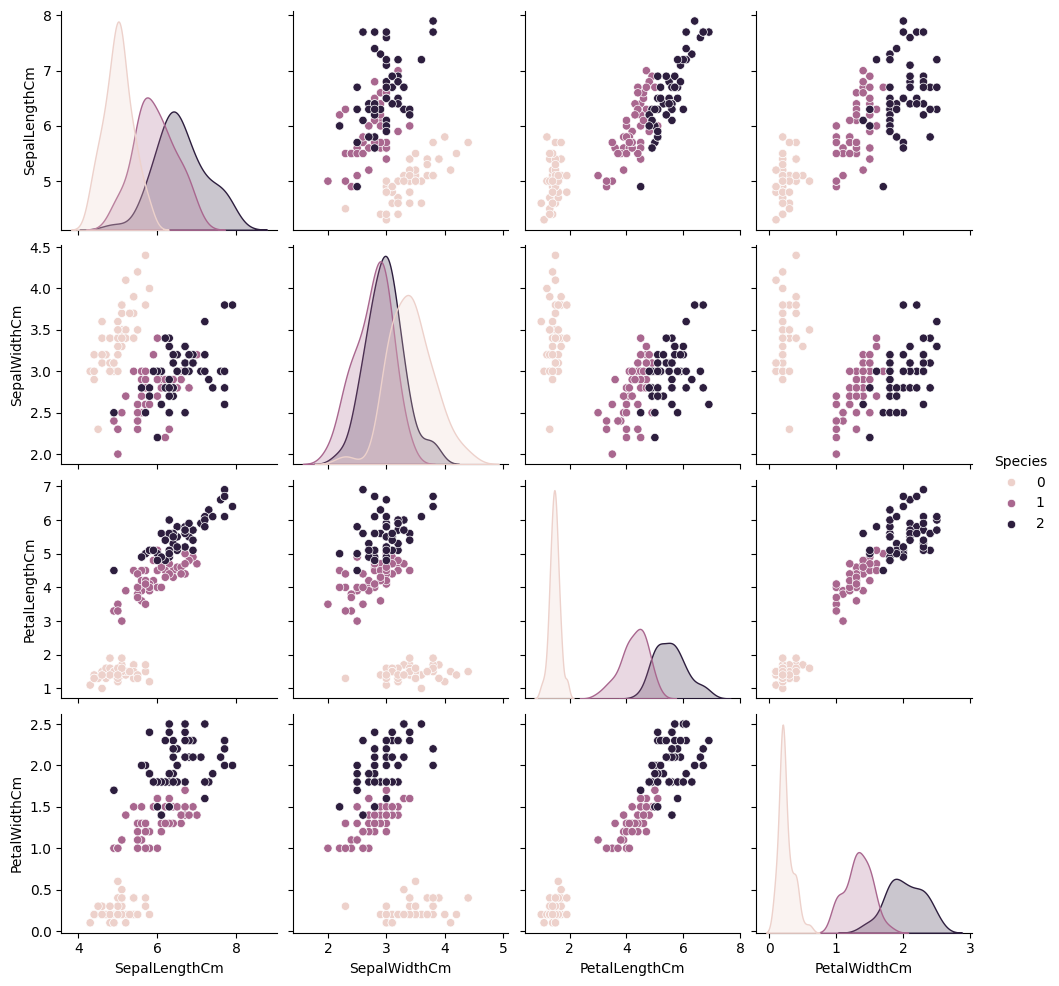

In [12]:
import seaborn as sns
sns.pairplot(df,hue='Species')

In [13]:
df = df[df['Species'] != 0][['SepalLengthCm','PetalLengthCm', 'Species']]

In [14]:
df

,SepalLengthCm,PetalLengthCm,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [15]:
import matplotlib.pyplot as plt

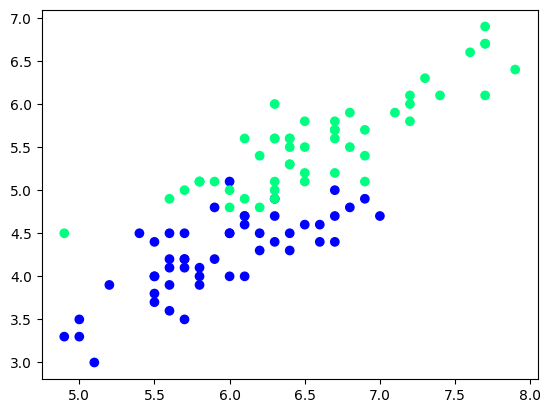

In [16]:
plt.scatter(df['SepalLengthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [17]:
df

,SepalLengthCm,PetalLengthCm,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [18]:
df = df.sample(100)
df_train = df.iloc[:60, :].sample(40)
df_val = df.iloc[60:80, :].sample(10)
df_test = df.iloc[80:,:].sample(10)

In [19]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [22]:
#we would be using decision trees for bagging.
# data for tree 1
df_beg1 = df_train.sample(20,replace =True)

X1 = df_beg1.iloc[:,0:2]
y1 = df_beg1.iloc[:,-1]

df_beg1.head(5)

,SepalLengthCm,PetalLengthCm,Species
55,5.7,4.5,1
70,5.9,4.8,1
104,6.5,5.8,2
107,7.3,6.3,2
62,6.0,4.0,1


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [24]:
dt_1 = DecisionTreeClassifier()

In [25]:
# creating a function to evaluate the Decision Tree model
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values,y.values,clf=clf)
    y_pred = clf.predict(X_test) 
    print(accuracy_score(y_test, y_pred))

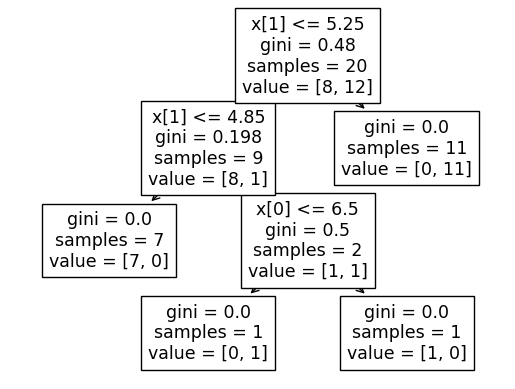

1.0


C:\Users\RGIPT\Desktop\Drill_Bit\drill_bit\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\RGIPT\Desktop\Drill_Bit\drill_bit\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


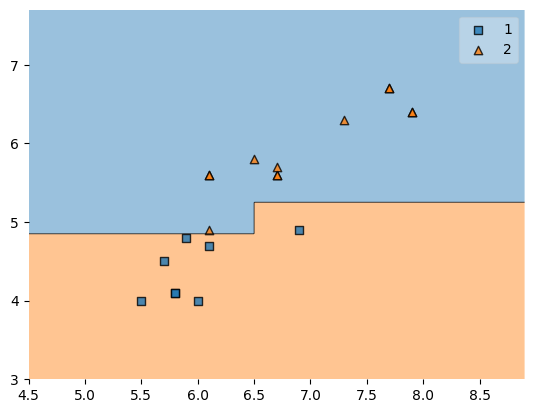

In [26]:
evaluate(dt_1,X1,y1)

In [28]:
# data for tree 2
df_beg2 = df_train.sample(20,replace =True)

X2 = df_beg2.iloc[:,0:2]
y2 = df_beg2.iloc[:,-1]

df_beg2.head(5)

,SepalLengthCm,PetalLengthCm,Species
124,6.7,5.7,2
122,7.7,6.7,2
58,6.6,4.6,1
104,6.5,5.8,2
138,6.0,4.8,2


In [29]:
dt_2 = DecisionTreeClassifier()

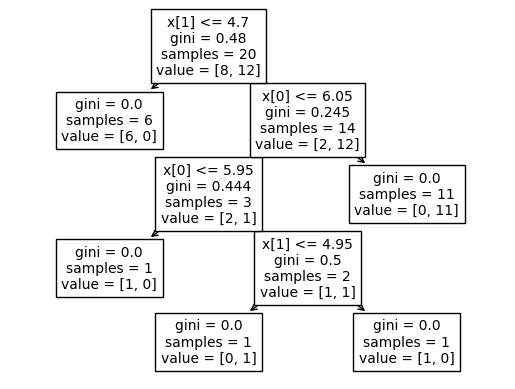

1.0


C:\Users\RGIPT\Desktop\Drill_Bit\drill_bit\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\RGIPT\Desktop\Drill_Bit\drill_bit\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


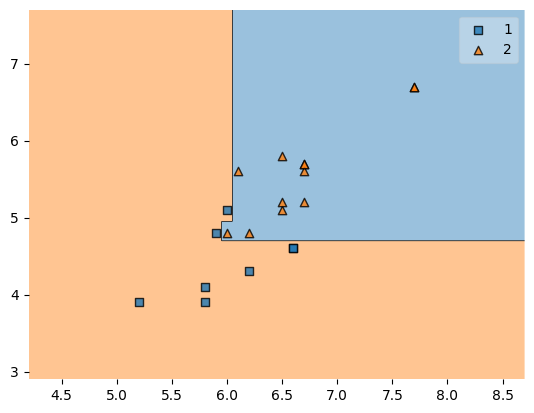

In [30]:
evaluate(dt_2,X2,y2)

In [31]:
# data for tree 3
df_beg3 = df_train.sample(20,replace =True)

X3 = df_beg3.iloc[:,0:2]
y3 = df_beg3.iloc[:,-1]

df_beg3.head(5)

,SepalLengthCm,PetalLengthCm,Species
111,6.4,5.3,2
73,6.1,4.7,1
144,6.7,5.7,2
148,6.2,5.4,2
144,6.7,5.7,2


In [32]:
dt_3 = DecisionTreeClassifier()


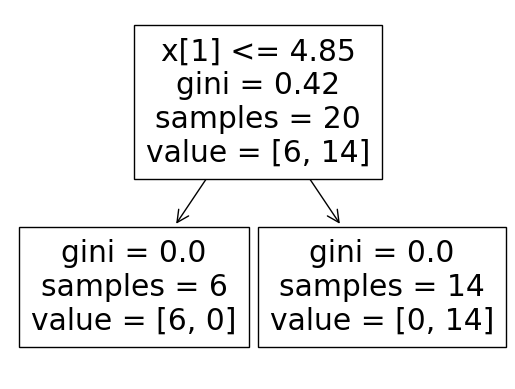

1.0


C:\Users\RGIPT\Desktop\Drill_Bit\drill_bit\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\RGIPT\Desktop\Drill_Bit\drill_bit\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


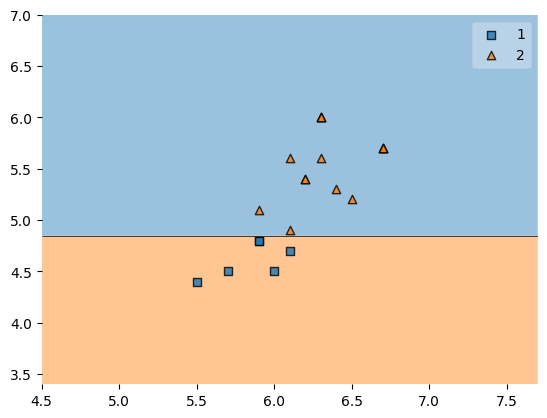

In [33]:
evaluate(dt_3,X3,y3)

In [34]:
#Predict

In [35]:
df_test

,SepalLengthCm,PetalLengthCm,Species
63,6.1,4.7,1
71,6.1,4.0,1
141,6.9,5.1,2
115,6.4,5.3,2
108,6.7,5.8,2
81,5.5,3.7,1
106,4.9,4.5,2
117,7.7,6.7,2
128,6.4,5.6,2
60,5.0,3.5,1


In [36]:
print("Predictor_1",dt_1.predict(np.array([6.9,5.1]).reshape(1,2)))
print("Predictor_2",dt_2.predict(np.array([6.9,5.1]).reshape(1,2)))
print("Predictor_3",dt_3.predict(np.array([6.9,5.1]).reshape(1,2)))

Predictor_1 [1]
Predictor_2 [2]
Predictor_3 [2]


C:\Users\RGIPT\Desktop\Drill_Bit\drill_bit\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\RGIPT\Desktop\Drill_Bit\drill_bit\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\RGIPT\Desktop\Drill_Bit\drill_bit\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier


# Load the Iris dataset

X = df.iloc[:,:2]
y = df.iloc[:,2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base decision tree classifier
base_classifier = DecisionTreeClassifier()

# Initialize the bagging classifier with base classifier and parameters
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train the bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.85
